# MobileNetv2.0 | Vehicle Collision Detection

# Dataset

[Car Crash Dataset (CCD)](https://www.kaggle.com/datasets/asefjamilajwad/car-crash-dataset-ccd)

# Download Dataset using Kaggle API

```bash
pip install kaggle
kaggle datasets download -d asefjamilajwad/car-crash-dataset-ccd
```

# Visualize the Dataset

Check Dataset

In [5]:
%cd /home/iphim/Downloads/Datasets/Car Crash Dataset (CCD)/

/home/iphim/Downloads/Datasets/Car Crash Dataset (CCD)


In [6]:
ls

car-crash-dataset-ccd.zip  CrashBest/  Crash_Table.csv


Check total item/image count in the dataset

In [7]:
%cd CrashBest

/home/iphim/Downloads/Datasets/Car Crash Dataset (CCD)/CrashBest


In [8]:
ls -1 | wc -l

75000


75000 images in the CrashBest dataset.

# Check CUDA (Nvidia GPU with CUDA support) availability

In [9]:
!nvidia-smi

Mon Jul  8 13:08:41 2024       

+---------------------------------------------------------------------------------------+

| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |

|-----------------------------------------+----------------------+----------------------+

| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |

| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |

|                                         |                      |               MIG M. |

|=========================================+======================+======================|

|   0  NVIDIA GeForce RTX 3060        Off | 00000000:07:00.0  On |                  N/A |

|  0%   48C    P8              10W / 170W |    291MiB / 12288MiB |      1%      Default |

|                                         |                      |                  N/A |

+-----------------------------------------+--------------

# Check whether Tensorflow-GPU is working or not

In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Check whether PyTorch-GPU is working or not

In [15]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Install Packages

In [16]:
!pip install imageio opencv-python pandas
















   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 1.9 MB/s eta 0:00:002.2 MB/s eta 0:00:01


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 3.9 MB/s eta 0:00:003.9 MB/s eta 0:00:01


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 4.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01




# Import Packages

In [17]:
import os
import cv2
import time
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys
import imageio
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Load data & pre-processing the dataset

In [18]:
BASE_PATH = "/home/iphim/Downloads/Datasets/Car Crash Dataset (CCD)/"

TABLENAME = "/home/iphim/Downloads/Datasets/Car Crash Dataset (CCD)/Crash_Table.csv"

df = pd.read_csv(TABLENAME)
arr = []

for ind in df.index:
    for i in range(1, 51):
        arr.append(df[f"frame_{i}"][ind])

print(len(arr))
dataset = keras.preprocessing.image_dataset_from_directory(BASE_PATH, labels=arr, batch_size=128, label_mode='int')
print(df.columns)

75000

Found 75000 files belonging to 2 classes.


2024-07-08 13:11:50.872578: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

2024-07-08 13:11:50.872762: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355

2024-07-08 13:11:50.872872: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L34

Index(['vidname', 'frame_1', 'frame_2', 'frame_3', 'frame_4', 'frame_5',

       'frame_6', 'frame_7', 'frame_8', 'frame_9', 'frame_10', 'frame_11',

       'frame_12', 'frame_13', 'frame_14', 'frame_15', 'frame_16', 'frame_17',

       'frame_18', 'frame_19', 'frame_20', 'frame_21', 'frame_22', 'frame_23',

       'frame_24', 'frame_25', 'frame_26', 'frame_27', 'frame_28', 'frame_29',

       'frame_30', 'frame_31', 'frame_32', 'frame_33', 'frame_34', 'frame_35',

       'frame_36', 'frame_37', 'frame_38', 'frame_39', 'frame_40', 'frame_41',

       'frame_42', 'frame_43', 'frame_44', 'frame_45', 'frame_46', 'frame_47',

       'frame_48', 'frame_49', 'frame_50', 'startframe', 'youtubeID', 'timing',

       'weather', 'egoinvolve'],

      dtype='object')


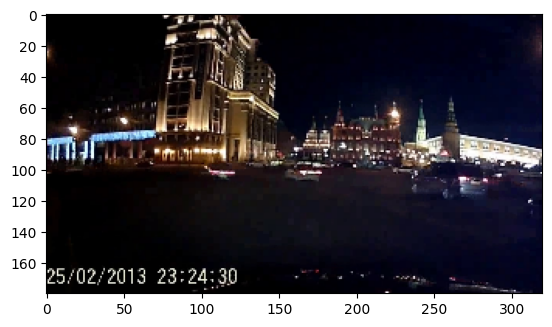

In [20]:
FILENAME = "/C_000051_"
FRAME = "12"
SCALE = 4

img = cv2.imread(BASE_PATH + "CrashBest/" + FILENAME + FRAME + ".jpg")
plt.imshow(img[::SCALE,::SCALE,::-1])

In [21]:
dataset = dataset.map(lambda x, y: (x / 255.0, y))

# Splitting the dataset into training and test dataset

In [22]:
train_size = int(len(dataset) * 0.8)
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)

tf.Tensor(0, shape=(), dtype=int32)


2024-07-08 13:13:02.170402: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134218240 bytes after encountering the first element of size 134218240 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size

2024-07-08 13:13:02.191010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


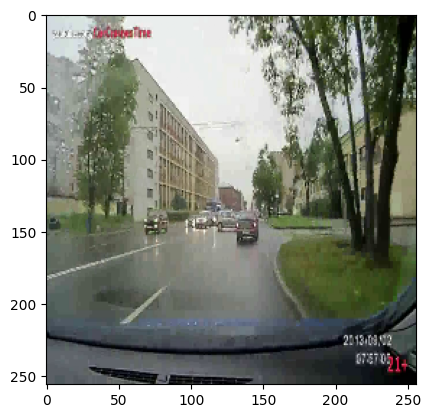

In [23]:
for t in train_ds.take(1):
    plt.imshow(t[0][0])
    print(t[1][0])

# MobileNet V2.0 Architecture

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def MobileNetV2(input_shape=(256, 256, 3), num_classes=1):
    inputs = tf.keras.Input(shape=input_shape)
    
    # MobileNetV2 backbone
    backbone = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')(inputs)
    
    # Add custom head for classification
    x = layers.GlobalAveragePooling2D()(backbone)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)
    
    model = Model(inputs=inputs, outputs=outputs, name='MobileNetV2')
    return model

model = MobileNetV2()
model.summary()

/tmp/ipykernel_2893/585559531.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.

  backbone = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')(inputs)



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "MobileNetV2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 2,387,969 (9.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

# Check current GPU usage after loading the model

In [25]:
!nvidia-smi

Mon Jul  8 13:14:30 2024       

+---------------------------------------------------------------------------------------+

| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |

|-----------------------------------------+----------------------+----------------------+

| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |

| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |

|                                         |                      |               MIG M. |

|=========================================+======================+======================|

|   0  NVIDIA GeForce RTX 3060        Off | 00000000:07:00.0  On |                  N/A |

|  0%   53C    P8              14W / 170W |  10547MiB / 12288MiB |      3%      Default |

|                                         |                      |                  N/A |

+-----------------------------------------+--------------

# Compiling the model and Model Training

In [27]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model checkpoint callback
checkpoint = ModelCheckpoint(
    filepath='best_model_iphim.keras',  # Save the model with the highest val accuracy
    monitor='val_binary_accuracy',      # Monitor the validation binary accuracy
    save_best_only=True,                # Save only the best model
    mode='max',                         # We want to maximize the validation accuracy
    verbose=1
)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Start measuring time
start_time = time.time()

# Fit the model with the checkpoint callback
history = model.fit(train_ds, epochs=50, verbose=1, validation_data=test_ds, callbacks=[checkpoint])

# Calculate the time taken for training
end_time = time.time()
training_time = end_time - start_time

# Calculate hours and minutes from training time
training_hours = int(training_time // 3600)
training_minutes = int((training_time % 3600) // 60)
training_seconds = int(training_time % 60)

# Find the highest validation accuracy
highest_val_acc = max(history.history['val_binary_accuracy'])

# Print the details
print(f"Time taken to train the neural network: {training_hours} hours, {training_minutes} minutes, {training_seconds} seconds")
print(f"Highest validation accuracy: {highest_val_acc:.4f}")
print("Model saved as best_model_iphim.keras")

Epoch 1/50


2024-07-08 13:17:33.550835: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


I0000 00:00:1720423053.567633    5359 service.cc:145] XLA service 0x771dc800c970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:

I0000 00:00:1720423053.567679    5359 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6

2024-07-08 13:17:34.703246: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.

2024-07-08 13:17:36.388905: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8902


I0000 00:00:1720423059.216308   10569 asm_compi

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - binary_accuracy: 0.7900 - loss: 0.4390

2024-07-08 13:21:31.532224: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size

I0000 00:00:1720423302.777904   16196 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1160', 4 bytes spill stores, 4 bytes spill loads



I0000 00:00:1720423303.016643   16199 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1160', 380 bytes spill stores, 232 bytes spill loads



I0000 00:00:1720423303.265084   16196 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1160', 260 bytes spill stores, 260 bytes spill loads






Epoch 1: val_binary_accuracy improved from -inf to 0.74821, saving model to best_model_iphim.keras

468/468 ━━━━━━━━━━━━━━━━━━━━ 273s 427ms/step - binary_accuracy: 0.7901 - loss: 0.4389 - val_binary_accuracy: 0.7482 - val_loss: 5.4190

Epoch 2/50


2024-07-08 13:21:54.011878: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - binary_accuracy: 0.8708 - loss: 0.2934

2024-07-08 13:24:48.025211: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 2: val_binary_accuracy improved from 0.74821 to 0.74848, saving model to best_model_iphim.keras

468/468 ━━━━━━━━━━━━━━━━━━━━ 184s 393ms/step - binary_accuracy: 0.8708 - loss: 0.2933 - val_binary_accuracy: 0.7485 - val_loss: 5.0923

Epoch 3/50


2024-07-08 13:24:58.020751: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - binary_accuracy: 0.9135 - loss: 0.2116

2024-07-08 13:27:54.953266: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 3: val_binary_accuracy did not improve from 0.74848

468/468 ━━━━━━━━━━━━━━━━━━━━ 187s 401ms/step - binary_accuracy: 0.9135 - loss: 0.2115 - val_binary_accuracy: 0.7187 - val_loss: 1.3937

Epoch 4/50


2024-07-08 13:28:05.500698: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - binary_accuracy: 0.9388 - loss: 0.1587

2024-07-08 13:31:07.960811: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 4: val_binary_accuracy did not improve from 0.74848

468/468 ━━━━━━━━━━━━━━━━━━━━ 195s 417ms/step - binary_accuracy: 0.9388 - loss: 0.1587 - val_binary_accuracy: 0.6954 - val_loss: 1.5094

Epoch 5/50


2024-07-08 13:31:20.810884: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - binary_accuracy: 0.9535 - loss: 0.1227

2024-07-08 13:34:17.159353: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 5: val_binary_accuracy improved from 0.74848 to 0.81101, saving model to best_model_iphim.keras

468/468 ━━━━━━━━━━━━━━━━━━━━ 186s 398ms/step - binary_accuracy: 0.9535 - loss: 0.1227 - val_binary_accuracy: 0.8110 - val_loss: 0.6126

Epoch 6/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - binary_accuracy: 0.9634 - loss: 0.1034

2024-07-08 13:37:32.191422: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 6: val_binary_accuracy did not improve from 0.81101

468/468 ━━━━━━━━━━━━━━━━━━━━ 196s 420ms/step - binary_accuracy: 0.9634 - loss: 0.1034 - val_binary_accuracy: 0.7709 - val_loss: 2.4041

Epoch 7/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - binary_accuracy: 0.9674 - loss: 0.0929

Epoch 7: val_binary_accuracy did not improve from 0.81101

468/468 ━━━━━━━━━━━━━━━━━━━━ 181s 386ms/step - binary_accuracy: 0.9674 - loss: 0.0929 - val_binary_accuracy: 0.7749 - val_loss: 3.4955

Epoch 8/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9725 - loss: 0.0784

Epoch 8: val_binary_accuracy improved from 0.81101 to 0.81638, saving model to best_model_iphim.keras

468/468 ━━━━━━━━━━━━━━━━━━━━ 179s 383ms/step - binary_accuracy: 0.9725 - loss: 0.0784 - val_binary_accuracy: 0.8164 - val_loss: 1.3969

Epoch 9/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - binary_accuracy: 0.9748 - loss: 0.0701

Epoch 9: val_binary_accuracy did not improve from 0.81638

468/468 ━━━━━━━━━━━

2024-07-08 14:11:00.981044: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 17: val_binary_accuracy improved from 0.88633 to 0.89063, saving model to best_model_iphim.keras

468/468 ━━━━━━━━━━━━━━━━━━━━ 190s 406ms/step - binary_accuracy: 0.9859 - loss: 0.0441 - val_binary_accuracy: 0.8906 - val_loss: 0.5081

Epoch 18/50


2024-07-08 14:11:11.707830: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - binary_accuracy: 0.9868 - loss: 0.0388

2024-07-08 14:14:08.740582: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 18: val_binary_accuracy did not improve from 0.89063

468/468 ━━━━━━━━━━━━━━━━━━━━ 187s 400ms/step - binary_accuracy: 0.9868 - loss: 0.0388 - val_binary_accuracy: 0.7462 - val_loss: 1.2721

Epoch 19/50


2024-07-08 14:14:18.951911: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - binary_accuracy: 0.9885 - loss: 0.0365

2024-07-08 14:17:17.318602: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 19: val_binary_accuracy did not improve from 0.89063

468/468 ━━━━━━━━━━━━━━━━━━━━ 189s 404ms/step - binary_accuracy: 0.9885 - loss: 0.0365 - val_binary_accuracy: 0.8763 - val_loss: 0.6947

Epoch 20/50


2024-07-08 14:17:28.074821: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - binary_accuracy: 0.9880 - loss: 0.0381

2024-07-08 14:20:21.062881: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 20: val_binary_accuracy improved from 0.89063 to 0.89103, saving model to best_model_iphim.keras

468/468 ━━━━━━━━━━━━━━━━━━━━ 183s 391ms/step - binary_accuracy: 0.9880 - loss: 0.0381 - val_binary_accuracy: 0.8910 - val_loss: 0.5678

Epoch 21/50


2024-07-08 14:20:30.896669: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - binary_accuracy: 0.9894 - loss: 0.0340

2024-07-08 14:23:27.369360: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 21: val_binary_accuracy did not improve from 0.89103

468/468 ━━━━━━━━━━━━━━━━━━━━ 187s 399ms/step - binary_accuracy: 0.9894 - loss: 0.0340 - val_binary_accuracy: 0.8765 - val_loss: 0.7985

Epoch 22/50


2024-07-08 14:23:37.737751: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - binary_accuracy: 0.9885 - loss: 0.0350

2024-07-08 14:26:38.754739: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 22: val_binary_accuracy did not improve from 0.89103

468/468 ━━━━━━━━━━━━━━━━━━━━ 191s 408ms/step - binary_accuracy: 0.9885 - loss: 0.0350 - val_binary_accuracy: 0.8819 - val_loss: 0.5796

Epoch 23/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - binary_accuracy: 0.9894 - loss: 0.0319

2024-07-08 14:29:44.717854: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 23: val_binary_accuracy improved from 0.89103 to 0.91501, saving model to best_model_iphim.keras

468/468 ━━━━━━━━━━━━━━━━━━━━ 186s 397ms/step - binary_accuracy: 0.9894 - loss: 0.0319 - val_binary_accuracy: 0.9150 - val_loss: 0.4331

Epoch 24/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9906 - loss: 0.0288

2024-07-08 14:32:41.787992: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 24: val_binary_accuracy did not improve from 0.91501

468/468 ━━━━━━━━━━━━━━━━━━━━ 177s 378ms/step - binary_accuracy: 0.9906 - loss: 0.0288 - val_binary_accuracy: 0.7970 - val_loss: 2.2346

Epoch 25/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9916 - loss: 0.0270

2024-07-08 14:35:38.019493: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 25: val_binary_accuracy did not improve from 0.91501

468/468 ━━━━━━━━━━━━━━━━━━━━ 176s 376ms/step - binary_accuracy: 0.9916 - loss: 0.0270 - val_binary_accuracy: 0.7968 - val_loss: 1.9035

Epoch 26/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9902 - loss: 0.0293

Epoch 26: val_binary_accuracy improved from 0.91501 to 0.92356, saving model to best_model_iphim.keras

468/468 ━━━━━━━━━━━━━━━━━━━━ 177s 379ms/step - binary_accuracy: 0.9902 - loss: 0.0293 - val_binary_accuracy: 0.9236 - val_loss: 0.3513

Epoch 27/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9914 - loss: 0.0296

Epoch 27: val_binary_accuracy did not improve from 0.92356

468/468 ━━━━━━━━━━━━━━━━━━━━ 177s 378ms/step - binary_accuracy: 0.9914 - loss: 0.0296 - val_binary_accuracy: 0.8686 - val_loss: 0.8245

Epoch 28/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9902 - loss: 0.0298

Epoch 28: val_binary_accuracy did not improve from 0.92356

468/468 ━━━━

2024-07-08 14:47:24.713844: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 29: val_binary_accuracy did not improve from 0.92356

468/468 ━━━━━━━━━━━━━━━━━━━━ 176s 377ms/step - binary_accuracy: 0.9926 - loss: 0.0243 - val_binary_accuracy: 0.8578 - val_loss: 1.2149

Epoch 30/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9904 - loss: 0.0279

2024-07-08 14:50:21.175294: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 30: val_binary_accuracy did not improve from 0.92356

468/468 ━━━━━━━━━━━━━━━━━━━━ 176s 377ms/step - binary_accuracy: 0.9904 - loss: 0.0279 - val_binary_accuracy: 0.8141 - val_loss: 1.2826

Epoch 31/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9926 - loss: 0.0255

2024-07-08 14:53:17.479413: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 31: val_binary_accuracy did not improve from 0.92356

468/468 ━━━━━━━━━━━━━━━━━━━━ 176s 377ms/step - binary_accuracy: 0.9926 - loss: 0.0255 - val_binary_accuracy: 0.8529 - val_loss: 0.7202

Epoch 32/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9916 - loss: 0.0256

2024-07-08 14:56:13.557397: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 32: val_binary_accuracy did not improve from 0.92356

468/468 ━━━━━━━━━━━━━━━━━━━━ 176s 376ms/step - binary_accuracy: 0.9916 - loss: 0.0256 - val_binary_accuracy: 0.9091 - val_loss: 0.4240

Epoch 33/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - binary_accuracy: 0.9933 - loss: 0.0228

2024-07-08 14:59:11.890663: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 134217728 bytes after encountering the first element of size 134217728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size




Epoch 33: val_binary_accuracy did not improve from 0.92356

468/468 ━━━━━━━━━━━━━━━━━━━━ 178s 381ms/step - binary_accuracy: 0.9933 - loss: 0.0228 - val_binary_accuracy: 0.8826 - val_loss: 0.4945

Epoch 34/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9921 - loss: 0.0241

Epoch 34: val_binary_accuracy did not improve from 0.92356

468/468 ━━━━━━━━━━━━━━━━━━━━ 177s 377ms/step - binary_accuracy: 0.9921 - loss: 0.0241 - val_binary_accuracy: 0.8713 - val_loss: 0.8438

Epoch 35/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9931 - loss: 0.0237

Epoch 35: val_binary_accuracy improved from 0.92356 to 0.92647, saving model to best_model_iphim.keras

468/468 ━━━━━━━━━━━━━━━━━━━━ 177s 378ms/step - binary_accuracy: 0.9931 - loss: 0.0237 - val_binary_accuracy: 0.9265 - val_loss: 0.2674

Epoch 36/50

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - binary_accuracy: 0.9922 - loss: 0.0247

Epoch 36: val_binary_accuracy did not improve from 0.92647

468/468 ━━━━

# Statistics

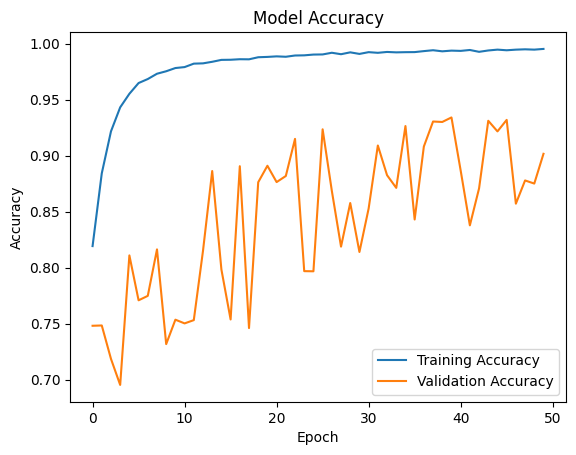

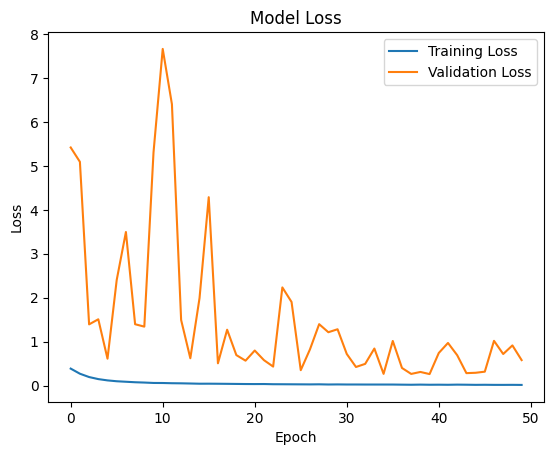

<Figure size 640x480 with 0 Axes>

In [28]:
def plot_accuracy(history):
    plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    plt.savefig("Model_Accuracy.png")

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.savefig("Model_Loss.png")
    
plot_accuracy(history)
plot_loss(history)